# Part II: Causal Inference with Models

教材的第二部分快速解读.

书的网址： https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/


**Contents**

```
11. Why model?
12. IP wighting and marginal structural model
13. Standardization and the parametric g-formula
14. G-estimation of structural nested models
15. Outcome regression and propensity scores
16. Instrumental variable estimation
17. Causal survival analysis
18. Variable selection for causal inference
```

**Big Picturce:**

非参数模型 --> parametric models --> structural mean models

- Models for the marginal mean of a counterfactual outcome are referred to as marginal structural mean models.
- Effect modification and marginal structural models 在上面的模型增加新的变量 for effect modification
- Structural nested mean model 会有一个对比某个基准 potential outcome.

In Part II of this book we have described two different types of models for causal inference: 

- propensity models and 
- structural models. 

Let us now compare them. 

- Propensity models are models for the probability of treatment $A$ given the variables $L$ used to try to achieve conditional exchangeability. 
- Structural models describe the relation between the treatment $A$ and some component of the distribution (e.g., the mean) of the counterfactual outcome

## Ch11 

## IP weight

## 一个例子讲懂因果推断

In [7]:
ls causal_inference_python_code/

chapter11.ipynb  chapter13.ipynb  chapter15.ipynb  codebook.xls
chapter12.ipynb  chapter14.ipynb  chapter16.ipynb  README.md


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 数据集合介绍

In [3]:
dat = pd.read_excel('NHEFS.xls')
dat.describe()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,seqn,qsmk,death,yrdth,modth,dadth,sbp,dbp,sex,age,...,birthcontrol,pregnancies,cholesterol,hightax82,price71,price82,tax71,tax82,price71_82,tax71_82
count,1629.000000,1629.000000,1629.000000,318.000000,322.000000,322.000000,1552.000000,1548.000000,1629.000000,1629.000000,...,1629.000000,726.00000,1613.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,16552.364641,0.262738,0.195212,87.569182,6.257764,15.872671,128.709407,77.744832,0.509515,43.915285,...,1.084715,3.69146,219.973962,0.165908,2.138750,1.806095,1.058581,0.505983,0.332741,0.552614
std,7498.918195,0.440256,0.396485,2.659415,3.615304,8.905488,19.051560,10.634864,0.500063,12.170430,...,0.947747,2.20560,45.444202,0.372119,0.229016,0.130641,0.216229,0.111894,0.155045,0.150321
min,233.000000,0.000000,0.000000,83.000000,1.000000,1.000000,87.000000,47.000000,0.000000,25.000000,...,0.000000,1.00000,78.000000,0.000000,1.506592,1.451904,0.524902,0.219971,-0.202698,0.035995
25%,10607.000000,0.000000,0.000000,85.000000,3.000000,8.000000,116.000000,70.000000,0.000000,33.000000,...,0.000000,2.00000,189.000000,0.000000,2.036621,1.739990,0.944946,0.439941,0.200989,0.460999
50%,20333.000000,0.000000,0.000000,88.000000,6.000000,15.500000,126.000000,77.000000,1.000000,44.000000,...,1.000000,3.00000,216.000000,0.000000,2.167969,1.814941,1.049805,0.505981,0.335999,0.543945
75%,22719.000000,1.000000,0.000000,90.000000,10.000000,24.000000,140.000000,85.000000,1.000000,53.000000,...,2.000000,5.00000,245.000000,0.000000,2.241699,1.867676,1.154785,0.571899,0.443787,0.621948
max,25061.000000,1.000000,1.000000,92.000000,12.000000,31.000000,229.000000,130.000000,1.000000,74.000000,...,2.000000,15.00000,416.000000,1.000000,2.692871,2.103027,1.522461,0.747925,0.612061,0.884399


In [24]:
codebook = pd.read_excel('causal_inference_python_code/codebook.xls')
codebook.Description = codebook.Description.apply(lambda s: s.lower())
codebook.iloc[:, 1].tolist()

['in your usual day, how active are you? in 1971, 0:very active, 1:moderately active, 2:inactive',
 'age in 1971',
 'how often do you drink?  in 1971  0: almost every day, 1: 2-3 times/week, 2: 1-4 times/month, 3: < 12 times/year, 4: no alcohol last year, 5: unknown',
 'when you drink, how much do you drink?  in 1971',
 'have you had 1 drink past year? in 1971,  1:ever, 0:never; 2:missing',
 'which do you most frequently drink? in 1971  1: beer, 2: wine, 3: liquor, 4: other/unknown',
 'use allergies medication in 1971,  1:ever, 0:never',
 'dx asthma in 1971, 1:ever, 0:never',
 'birth control pills past 6 months? in 1971 1:yes, 0:no, 2:missing',
 'check state code - second page',
 'use bowel trouble medication in 1971,  1:ever, 0:never, ; 2:missing',
 'dx chronic bronchitis/emphysema in 1971,  1:ever, 0:never',
 'serum cholesterol (mg/100ml) in 1971',
 'dx chronic cough in 1971,  1:ever, 0:never',
 'dx colitis in 1971,  1:ever, 0:never',
 'day of death',
 'diastolic blood pressure in 19

In [31]:
codebook

,Variable name,Description
0,active,"in your usual day, how active are you? in 1971..."
1,age,age in 1971
2,alcoholfreq,how often do you drink? in 1971 0: almost ev...
3,alcoholhowmuch,"when you drink, how much do you drink? in 1971"
4,alcoholpy,"have you had 1 drink past year? in 1971, 1:ev..."
5,alcoholtype,which do you most frequently drink? in 1971 1...
6,allergies,"use allergies medication in 1971, 1:ever, 0:n..."
7,asthma,"dx asthma in 1971, 1:ever, 0:never"
8,bithcontrol,birth control pills past 6 months? in 1971 1:y...
9,birthplace,check state code - second page


### EDA

In [25]:
dat.columns

Index(['seqn', 'qsmk', 'death', 'yrdth', 'modth', 'dadth', 'sbp', 'dbp', 'sex',
       'age', 'race', 'income', 'marital', 'school', 'education', 'ht', 'wt71',
       'wt82', 'wt82_71', 'birthplace', 'smokeintensity', 'smkintensity82_71',
       'smokeyrs', 'asthma', 'bronch', 'tb', 'hf', 'hbp', 'pepticulcer',
       'colitis', 'hepatitis', 'chroniccough', 'hayfever', 'diabetes', 'polio',
       'tumor', 'nervousbreak', 'alcoholpy', 'alcoholfreq', 'alcoholtype',
       'alcoholhowmuch', 'pica', 'headache', 'otherpain', 'weakheart',
       'allergies', 'nerves', 'lackpep', 'hbpmed', 'boweltrouble', 'wtloss',
       'infection', 'active', 'exercise', 'birthcontrol', 'pregnancies',
       'cholesterol', 'hightax82', 'price71', 'price82', 'tax71', 'tax82',
       'price71_82', 'tax71_82'],
      dtype='object')

In [28]:
d = dat[['sex', 'wt82']]
d.head(10)

,sex,wt82
0,0,68.946040
1,0,61.234970
2,1,66.224486
3,0,64.410117
4,0,92.079251
5,1,103.419060
6,1,58.967008
7,1,58.967008
8,0,62.142155
9,0,72.121187


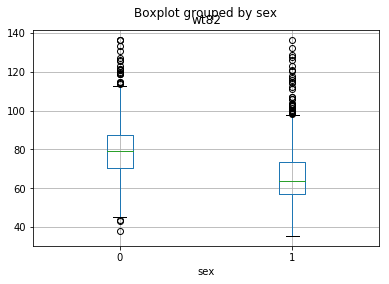

In [38]:
d.boxplot(column='wt82', by='sex')

In [39]:
d.groupby('sex').describe()

wt82                                                                    \
     count       mean        std        min        25%        50%        75%   
sex                                                                            
0    762.0  80.131080  14.567845  38.101759  70.306817  78.925072  87.543327   
1    804.0  67.155366  15.022770  35.380205  57.039241  63.956524  73.481964   

                 
            max  
sex              
0    136.531303  
1    136.531303

In [45]:
d_test = pd.DataFrame(data=[1,2,3,10,4],columns=['x'])
d_test

,x
0,1
1,2
2,3
3,10
4,4


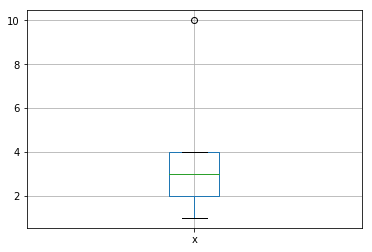

In [46]:
d_test.boxplot(column='x')